# 大数定律与中心极限定理

## 概述

本讲座展示了概率统计中两个最重要的结果：

1. 大数定律（LLN）和
2. 中心极限定理（CLT）。

这些美丽的定理是许多计量经济学和定量经济模型的基础。

本讲座围绕模拟进行，展示了大数定律和中心极限定理的实际操作。

我们还将演示当所依赖的假设不成立时，大数定律和中心极限定理如何失效。

本讲将关注单变量情况（多变量情况在[更高级的讲座中处理](https://python.quantecon.org/lln_clt.html#the-multivariate-case)）。

我们将需要以下导入：

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as st

import matplotlib as mpl
FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

(lln_mr)=
## 大数定律

```{index} single: Law of Large Numbers
```

我们从大数定律开始讲起，该定律说明在什么条件下样本平均值会收敛到它们的总体平均值。

### 大数定律的应用

在我们进一步讨论之前，让我们看一个大数定律的例子。

```{prf:example}
:label: lln_ex_ber

考虑一个参数为 $p$ 的[伯努利随机变量](https://en.wikipedia.org/wiki/Bernoulli_distribution) $X$。

这意味着 $X$ 的取值在 $\{0,1\}$ 中，且 $\mathbb P\{X=1\} = p$。

我们可以将抽取 $X$ 想象为抛掷一个有偏的硬币，其中

* 硬币落在“正面”的概率为 $p$，
* 硬币落在“反面”的概率为 $1-p$。

如果硬币是“正面”，我们设 $X=1$，否则为零。

$X$ 的（总体）均值为

$$
    \mathbb E X 
    = 0 \cdot \mathbb P\{X=0\} + 1 \cdot \mathbb P\{X=1\} = \mathbb P\{X=1\} = p
$$
```

我们可以使用 `scipy.stats`（导入为 `st`）生成一个 $X$ 的抽样，如下：

In [2]:
p = 0.8
X = st.bernoulli.rvs(p)
print(X)

1


在这个场景中，大数定律告诉我们如果我们多次投掷硬币，我们看到的正面比例将接近均值 $p$。

我们使用 $n$ 来表示投掷硬币的次数。

让我们检查一下：

In [3]:
n = 1_000_000
X_draws = st.bernoulli.rvs(p, size=n)
print(X_draws.mean()) # 计算1的个数并除以n

0.799994


如果我们改变 $p$，这个说法仍然成立：

In [4]:
p = 0.3
X_draws = st.bernoulli.rvs(p, size=n)
print(X_draws.mean())

0.300193


让我们将这个讨论与上面的讨论联系起来，我们说的样本平均值收敛于“群体平均值”。

想象 $X_1, \ldots, X_n$ 是独立的投掷硬币行为。

群体平均值是在无限样本中的平均值，等于期望 $\mathbb E X$。

抽样的平均值义 $X_1, \ldots, X_n$ 是

$$
    \bar X_n := \frac{1}{n} \sum_{i=1}^n X_i
$$

在这种情况下，它是等于一的抽样的比例（正面的数量除以 $n$）。

因此，大数定律告诉我们对于上述伯努利试验

```{math}
:label: exp
    \bar X_n \to \mathbb E X = p
    \qquad (n \to \infty)
```

这正是我们在代码中演示的。


(lln_ksl)=
### 大数定律的陈述

让我们更仔细地阐述大数定律。

设 $X_1, \ldots, X_n$ 是随机变量，它们都具有相同的分布。

这些随机变量可以是连续的或离散的。

为简单起见，我们将：

* 假设它们是连续的，并且
* 让 $f$ 表示它们的共同密度函数

最后这个说法意味着，对于 $\{1, \ldots, n\}$ 中的任何 $i$ 和任何数 $a, b$，

$$ 
  \mathbb P\{a \leq X_i \leq b\} = \int_a^b f(x) dx
$$

（对于离散情况，我们需要用概率质量函数替换密度，并用求和替换积分。）

让 $\mu$ 表示这个样本的共同平均值。

因此，对于每个 $i$，

$$
  \mu := \mathbb E X_i = \int_{-\infty}^{\infty} x f(x) dx
$$

样本均值是

$$
    \bar X_n := \frac{1}{n} \sum_{i=1}^n X_i
$$

接下来的定理称为柯尔莫哥洛夫强大数律。

(iid-theorem)=
````{prf:theorem}
如果 $X_1, \ldots, X_n$ 是独立同分布(IID)的，且 $\mathbb E |X|$ 是有限的，则

```{math}
:label: lln_as

\mathbb P \left\{ \overline{X}_n \to \mu \text{ 当 } n \to \infty \right\} = 1
```
````

这里

* IID 表示独立同分布
* $\mathbb E |X| = \int_{-\infty}^\infty |x| f(x) dx$


### 关于定理的评论

定理中的概率为一是什么意思？

我们尝试从模拟的角度来考虑，假设一下我们的计算机可以生成完美的随机样本（尽管事实上这[并非严格真实](https://en.wikipedia.org/wiki/Pseudorandom_number_generator)）。

同时假设我们可以生成无限序列，从而使得 $\bar X_n \to \mu$ 能够得到评估。

在这种设置下，{eq}`lln_as` 应该被理解为计算机生成一个 $\bar X_n \to \mu$ 失败发生的概率是零。

### 示例说明

```{index} single: Law of Large Numbers; Illustration
```

让我们使用模拟来说明大数定律（LLN）。

在说明它时，我们将使用一个关键思想：样本均值 $\bar X_n$ 本身是一个随机变量。

$\bar X_n$ 是随机变量的原因是它是随机变量 $X_1, \ldots, X_n$ 的函数。

我们现在要做的是：

1. 选择一些固定的分布来抽取每个 $X_i$
1. 将 $n$ 设置为一个较大的数字

然后重复以下三个步骤：

1. 生成抽样 $X_1, \ldots, X_n$
1. 计算样本均值 $\bar X_n$ 并在数组 `sample_means` 中记录其值
1. 返回步骤 1。

我们将循环这三个步骤 $m$ 次，其中 $m$ 是一个较大的整数。

数组 `sample_means` 现在将包含 $m$ 次抽取的随机变量 $\bar X_n$。

如果我们对 $\bar X_n$ 的这些观测做直方图，我们应该看到它们聚集在总体平均值 $\mathbb E X$ 周围。

此外，如果我们在更大的 $n$ 值下重复这个练习，我们应该看到观测结果更紧密地聚集在总体平均值周围。

这实质上就是 LLN 告诉我们的内容。

为了实现这些步骤，我们将使用函数。

我们的第一个函数生成给定分布的大小为 $n$ 的样本均值。

In [5]:
def draw_means(X_distribution,  # 各个 X_i 的分布
               n):              # 样本均值的大小

    # 生成 n 次抽样：X_1, ..., X_n
    X_samples = X_distribution.rvs(size=n)

    # 返回样本均值
    return np.mean(X_samples)

现在我们写一个函数来生成 $m$ 个样本均值并绘制它们的直方图。

In [6]:
def generate_histogram(X_distribution, n, m): 

    # 计算 m 个样本均值
    sample_means = np.empty(m)
    for j in range(m):
      sample_means[j] = draw_means(X_distribution, n) 

    # 生成一个直方图
    fig, ax = plt.subplots()
    ax.hist(sample_means, bins=30, alpha=0.5, density=True)
    μ = X_distribution.mean()  # 获取总体均值
    σ = X_distribution.std()    # 及标准偏差
    ax.axvline(x=μ, ls="--", c="k", label=fr"$\mu = {μ}$")
     
    ax.set_xlim(μ - σ, μ + σ)
    ax.set_xlabel(r'$\bar X_n$', size=12)
    ax.set_ylabel('密度', size=12)
    ax.legend()
    plt.show()

现在我们调用这个函数。

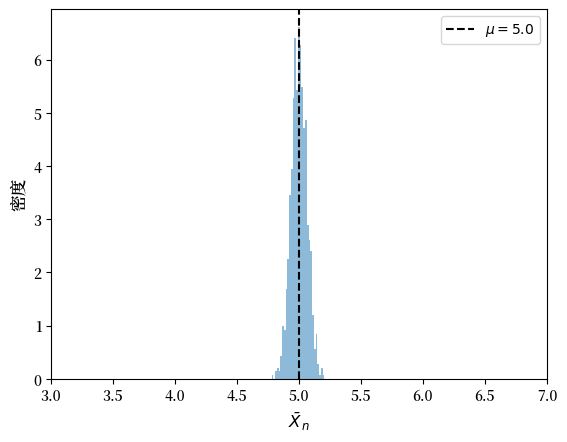

In [7]:
# 选择一个分布来绘制每个 $X_i$
X_distribution = st.norm(loc=5, scale=2) 
# 调用函数
generate_histogram(X_distribution, n=1_000, m=1000)

我们可以看到 $\bar X$ 的分布像预期的那样围绕 $\mathbb E X$ 聚集。

让我们改变 `n` 来看样本均值的分布是如何变化的。

我们将使用[小提琴图](https://intro.quantecon.org/prob_dist.html#violin-plots)来显示不同的分布。

小提琴图中的每一个分布代表着某个 $n$ 的 $X_n$ 分布，通过模拟计算得到。

In [8]:
def means_violin_plot(distribution,  
                      ns = [1_000, 10_000, 100_000],
                      m = 10_000):

    data = []
    for n in ns:
        sample_means = [draw_means(distribution, n) for i in range(m)]
        data.append(sample_means)

    fig, ax = plt.subplots()

    ax.violinplot(data)
    μ = distribution.mean()
    ax.axhline(y=μ, ls="--", c="k", label=fr"$\mu = {μ}$")

    labels=[fr'$n = {n}$' for n in ns]

    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)


    plt.subplots_adjust(bottom=0.15, wspace=0.05)

    ax.set_ylabel('密度', size=12)
    ax.legend()
    plt.show()

我们来试试正态分布。

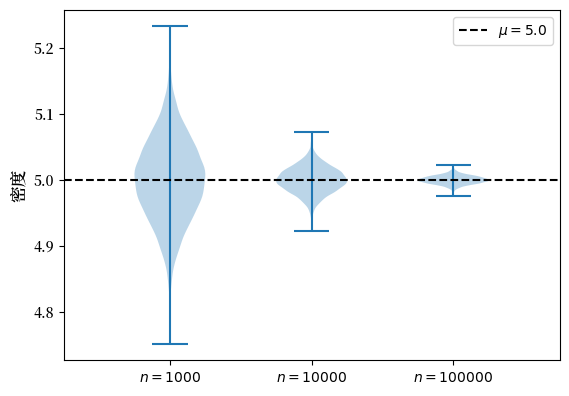

In [9]:
means_violin_plot(st.norm(loc=5, scale=2))

随着 $n$ 的增大，更多的概率质量聚集在总体均值 $\mu$ 附近。

现在我们试试 Beta 分布。

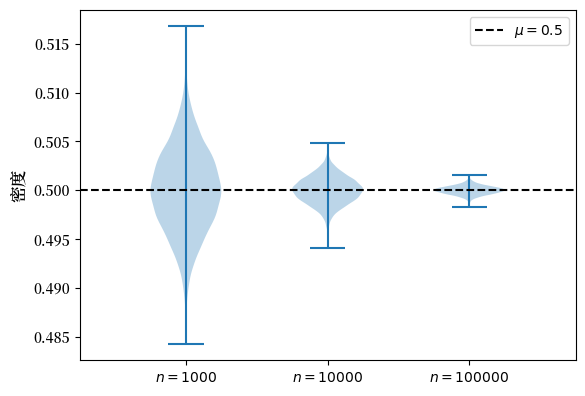

In [10]:
means_violin_plot(st.beta(6, 6))

我们得到了类似的结果。

## 打破大数定律

我们必须关注大数定律陈述中的假设。

如果这些假设不成立，那么大数定律可能会失败。

### 无限的第一矩

如定理所示，当 $\mathbb E |X|$ 不是有限的时候，大数定律可以失败。

我们可以使用[柯西分布](https://zh.wikipedia.org/wiki/%E6%9F%AF%E8%A5%BF%E5%88%86%E5%B8%83)来证明这一点。

柯西分布具有以下性质：

如果 $X_1, \ldots, X_n$ 是独立同分布且符合柯西分布，那么 $\bar X_n$ 也符合柯西分布。

这意味着 $\bar X_n$ 的分布最终不会集中在某一个数字上。

因此大数定律不成立。

这里大数定律失败是因为柯西分布违反了假设 $\mathbb E|X| < \infty$。

### IID 条件的失败

LLN 可能因违反 IID 假设而不成立。

```{prf:example}
:label: lln_ex_fail

$$
    X_0 \sim N(0,1)
    \quad \text{和} \quad
    X_i = X_{i-1} \quad \text{对于} \quad i = 1, ..., n
$$

在这种情况下，

$$
    \bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i = X_0 \sim N(0,1)
$$

因此，$\bar{X}_n$ 的分布对所有 $n$ 都是 $N(0,1)$！
```

这是否与 LLN 相矛盾，LLN 表明 $\bar{X}_n$ 的分布将收敛至单点 $\mu$？

不，LLN 是正确的——问题在于其假设未被满足。

特别是，序列 $X_1, \ldots, X_n$ 不是独立的。

```{note}
:name: iid_violation

尽管在这种情况下，IID 的违反破坏了 LLN，但*有*的情况下即使 IID 失败 LLN 仍然成立。

我们将在[练习](lln_ex3)中展示一个例子。
```

## 中心极限定理

```{index} single: Central Limit Theorem
```

接下来，我们来讨论中心极限定理（CLT），它告诉我们样本均值与总体均值之间的偏差的分布情况。

### 定理的陈述

中心极限定理是数学中最了不起的结果之一。

在独立同分布（IID）的设定下，它告诉我们以下内容：

````{prf:theorem}
:label: statement_clt

如果 $X_1, \ldots, X_n$ 是 IID，具有共同的均值 $\mu$ 和共同的方差 $\sigma^2 \in (0, \infty)$，那么

```{math}
:label: lln_clt

\sqrt{n} (\bar X_n - \mu ) \stackrel { d } { \to } N(0, \sigma^2)
\quad \text{as} \quad
n \to \infty
```
````

这里的 $\stackrel { d } { \to } N(0, \sigma^2)$ 表示[分布收敛](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_distribution)到以 0 为均值且标准差为 $\sigma$ 的正态分布。

CLT 的惊人含义是，对于任何具有有限[二阶矩](https://en.wikipedia.org/wiki/Moment_(mathematics))的分布，简单地添加独立副本总是会得到高斯（正态）曲线。




### 模拟 1

由于中心极限定理(CLT)几乎像魔法一样，运行验证其含义的模拟是构建理解的一种好方法。

为此，我们现在进行以下模拟：

1. 为基本观察值 $X_i$ 选择一个任意分布 $F$。
1. 生成独立的 $Y_n := \sqrt{n} (\bar{X}_n - \mu)$ 的抽取。
1. 使用这些抽取来计算它们的分布的某些度量值——例如直方图。
1. 将后者与 $N(0, \sigma^2)$ 进行比较。

下面的代码正是为指数分布 $F(x) = 1 - e^{- \lambda x}$ 执行了这一操作。

（请尝试使用其他 $F$ 的选择，但请记住，为了符合CLT的条件，分布必须有有限的二阶矩。）

(sim_one)=

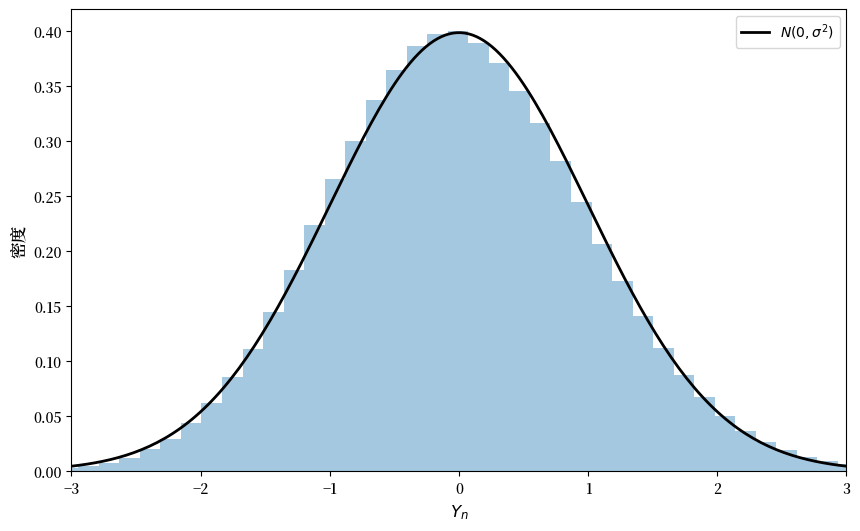

In [11]:
# 设定参数
n = 250               # n 的选择
k = 1_000_000         # Y_n 的抽取次数
distribution = st.expon(2) # 指数分布，λ = 1/2
μ, σ = distribution.mean(), distribution.std()

# 抽取底层随机变量。每行包含一次抽取的 X_1, ..., X_n
data = distribution.rvs((k, n))
# 计算每行的均值，生成 k 次抽取的 \bar{X}_n
sample_means = data.mean(axis=1)
# 生成 Y_n 的观察值
Y = np.sqrt(n) * (sample_means - μ)

# 绘图
fig, ax = plt.subplots(figsize=(10, 6))
xmin, xmax = -3 * σ, 3 * σ
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins=60, alpha=0.4, density=True)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, st.norm.pdf(xgrid, scale=σ), 
        'k-', lw=2, label=r'$N(0, \sigma^2)$')
ax.set_xlabel(r"$Y_n$", size=12)
ax.set_ylabel("密度", size=12)

ax.legend()

plt.show()

（注意这里没有 for 循环——所有的操作都是矢量化的，意味着主要计算都转移到了快速的 C 代码上。）

通过增加 `n`，拟合到正态密度可以进一步改进。


## 练习



```{exercise} 
:label: lln_ex1

用[贝塔分布](https://en.wikipedia.org/wiki/Beta_distribution)重复[上面](sim_one)的模拟。

你可以选择任何 $\alpha > 0$ 和 $\beta > 0$。
```

```{solution-start} lln_ex1
:class: dropdown
```

Font 'rm' does not have a glyph for '\u5bc6' [U+5bc6], substituting with a dummy symbol.


Font 'rm' does not have a glyph for '\u5ea6' [U+5ea6], substituting with a dummy symbol.


Font 'rm' does not have a glyph for '\u5bc6' [U+5bc6], substituting with a dummy symbol.


Font 'rm' does not have a glyph for '\u5ea6' [U+5ea6], substituting with a dummy symbol.


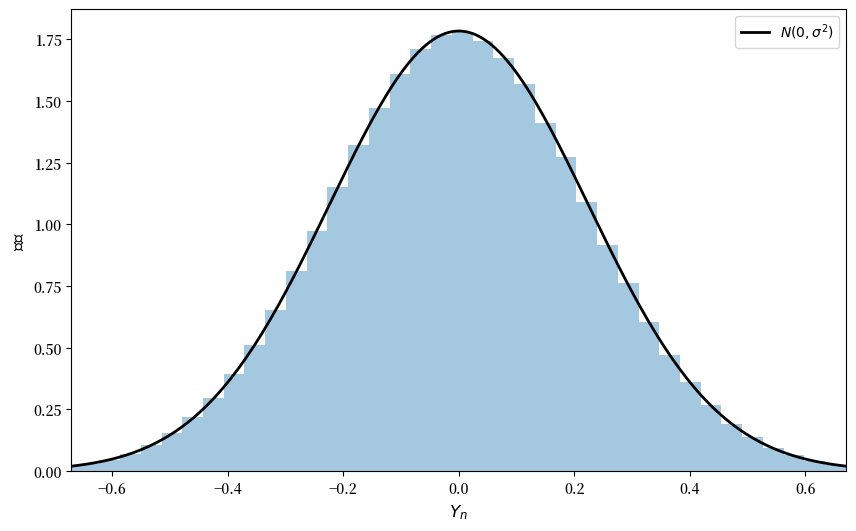

In [12]:
# 设置参数
n = 250         # 选择 n 的值
k = 1_000_000        # Y_n 的抽样次数
distribution = st.beta(2,2) # 这里选择 Beta(2, 2) 作为示例
μ, σ = distribution.mean(), distribution.std()

# 抽取底层随机变量。每行包含一次抽取的 X_1,..,X_n
data = distribution.rvs((k, n))
# 计算每行的均值，生成 k 次 \bar X_n 的抽样
sample_means = data.mean(axis=1)
# 生成 Y_n 的观测值
Y = np.sqrt(n) * (sample_means - μ)

# 绘图
fig, ax = plt.subplots(figsize=(10, 6))
xmin, xmax = -3 * σ, 3 * σ
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins=60, alpha=0.4, density=True)
ax.set_xlabel(r"$Y_n$", size=12)
ax.set_ylabel(r"$密度$", size=12)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, st.norm.pdf(xgrid, scale=σ), 'k-', lw=2, label='$N(0, \sigma^2)$')
ax.legend()

plt.show()

```{solution-end}
```

````{exercise} 
:label: lln_ex2

在这次讲座开始时，我们讨论了伯努利随机变量。

NumPy没有提供我们可以从中采样的`bernoulli`函数。

但是，我们可以通过NumPy生成伯努利$X$的抽样，使用以下方式：

```python3
U = np.random.rand()
X = 1 if U < p else 0
print(X)
```

解释为什么这能提供一个具有正确分布的随机变量$X$。
````

```{solution-start} lln_ex2
:class: dropdown
```

我们可以将$X$写为$X = \mathbf 1\{U < p\}$，其中$\mathbf 1$是
[指示函数](https://en.wikipedia.org/wiki/Indicator_function)（即，
如果语句为真则为1，否则为0）。

这里我们生成了一个在$[0,1]$上均匀分布的$U$，然后使用了以下事实：

$$
\mathbb P\{0 \leq U < p\} = p - 0 = p
$$

这意味着$X = \mathbf 1\{U < p\}$具有正确的分布。

```{solution-end}
```

```{exercise}
:label: lln_ex3

我们上面提到即使违反IID条件，LLN有时仍然成立。

让我们进一步调查这个说法。

考虑AR(1)过程

$$
    X_{t+1} = \alpha + \beta X_t + \sigma \epsilon _{t+1}
$$

其中 $\alpha, \beta, \sigma$ 是常数，$\epsilon_1, \epsilon_2,
\ldots$ 是独立同分布且标准正态。

假设

$$
    X_0 \sim N \left(\frac{\alpha}{1-\beta}, \frac{\sigma^2}{1-\beta^2}\right)
$$

这个过程违反了LLN的独立性假设
（因为 $X_{t+1}$ 依赖于 $X_t$ 的值）。

然而，下一个练习告诉我们，样本均值向总体均值的LLN类型收敛仍然会发生。

1. 证明序列 $X_1, X_2, \ldots$ 是同分布的。
2. 使用模拟证明LLN收敛成立，其中 $\alpha = 0.8$, $\beta = 0.2$。

```

```{solution-start} lln_ex3
:class: dropdown
```

**Q1 解答**

关于第一部分，我们认为 $X_t$ 在所有 $t$ 时刻的分布与 $X_0$ 相同。

为了构建证明，我们假设这个命题对 $X_t$ 是正确的。

现在我们声称它对于 $X_{t+1}$ 也是正确的。

观察我们是否得到了正确的均值：

$$
\begin{aligned}
    \mathbb E X_{t+1} &= \alpha + \beta \mathbb E X_t \\
    &= \alpha + \beta \frac{\alpha}{1-\beta} \\
    &= \frac{\alpha}{1-\beta}
\end{aligned}
$$ 

我们也得到了正确的方差：

$$
\begin{aligned}
    \mathrm{Var}(X_{t+1}) &= \beta^2 \mathrm{Var}(X_{t}) + \sigma^2\\
    &= \frac{\beta^2\sigma^2}{1-\beta^2} + \sigma^2 \\
    &= \frac{\sigma^2}{1-\beta^2}
\end{aligned}
$$ 

最后，由于 $X_t$ 和 $\epsilon_0$ 都是正态分布并且彼此独立，这两个变量的任何线性组合也是正态分布的。

我们现在已经展示了

$$
    X_{t+1} \sim 
    N \left(\frac{\alpha}{1-\beta}, \frac{\sigma^2}{1-\beta^2}\right) 
$$ 

我们可以得出结论，这个AR(1)过程违反了独立性假设，但是分布相同。

**Q2 解决方案**

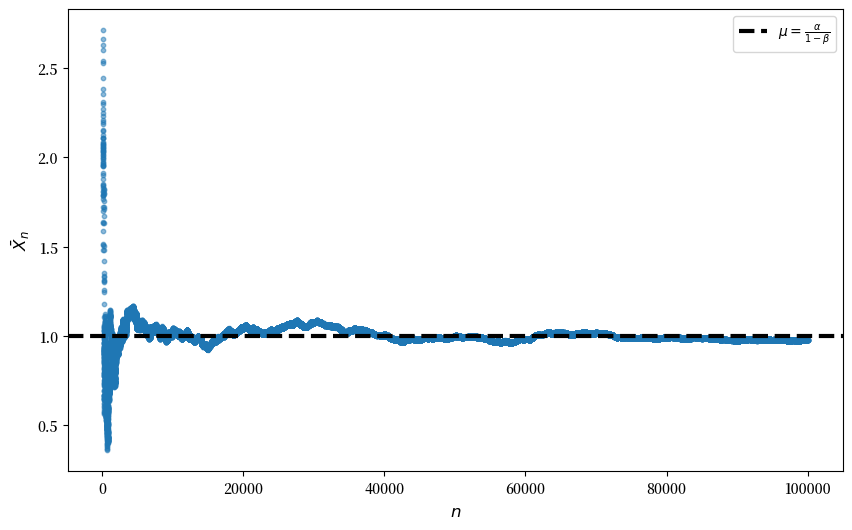

In [13]:
σ = 10
α = 0.8
β = 0.2
n = 100_000

fig, ax = plt.subplots(figsize=(10, 6))
x = np.ones(n)
x[0] = st.norm.rvs(α/(1-β), α**2/(1-β**2))
ϵ = st.norm.rvs(size=n+1)
means = np.ones(n)
means[0] = x[0]
for t in range(n-1):
    x[t+1] = α + β * x[t] + σ * ϵ[t+1]
    means[t+1] = np.mean(x[:t+1])


ax.scatter(range(100, n), means[100:n], s=10, alpha=0.5)

ax.set_xlabel(r"$n$", size=12)
ax.set_ylabel(r"$\bar{X}_n$", size=12)
yabs_max = max(ax.get_ylim(), key=abs)
ax.axhline(y=α/(1-β), ls="--", lw=3, 
           label=r"$\mu = \frac{\alpha}{1-\beta}$", 
           color = 'black')

plt.legend()
plt.show()

我们看到在独立性假设被违反的情况下，$\bar{x}$ 仍然收敛于 $\mu$。

```{solution-end}
```